<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Toric_Code_3x3_Lattice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install Qiskit

import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

def create_toric_code_circuit(rows=3, cols=3): #this is a 3 by 3 lattice
# All 18 qubits are data qubits
# Stabilizer measurements are performed on the connections between these qubits
# The topological nature means error correction is inherent in the qubit arrangement
# No additional ancilla or measurement qubits are typically used in the basic toric code design
    """
    Create a simplified toric code quantum circuit

    Args:
    rows (int): Number of rows in the toric lattice
    cols (int): Number of columns in the toric lattice

    Returns:
    QuantumCircuit: A quantum circuit representing a basic toric code
    """
    # Total number of qubits: each edge of the lattice has a qubit
    total_qubits = rows * cols * 2

    # Create quantum circuit
    qc = QuantumCircuit(total_qubits)

    # Simulate stabilizer measurements
    # X-type stabilizers (vertex operators)
    for row in range(rows):
        for col in range(cols):
            # Apply Hadamard to create superposition
            qc.h(row * cols + col)

            # Entangle neighboring qubits
            qc.cx(row * cols + col, ((row + 1) % rows) * cols + col)

    # Z-type stabilizers (face operators)
    for row in range(rows):
        for col in range(cols):
            qc.z(row * cols + col)
            qc.cz(row * cols + col, ((row + 1) % rows) * cols + ((col + 1) % cols))

    # Error correction cycle (simplified)
    qc.barrier()

    return qc

# Create the toric code circuit
toric_circuit = create_toric_code_circuit()

# Print the circuit
print(toric_circuit)

      ┌───┐                                        ┌───┐┌───┐                »
 q_0: ┤ H ├──■─────────────────────────────────────┤ X ├┤ Z ├───────────■────»
      ├───┤  │                                     └─┬─┘├───┤┌───┐      │    »
 q_1: ┤ H ├──┼────■──────────────────────────────────┼──┤ X ├┤ Z ├──────┼──■─»
      ├───┤  │    │                                  │  └─┬─┘├───┤┌───┐ │  │ »
 q_2: ┤ H ├──┼────┼────■─────────────────────────────┼────┼──┤ X ├┤ Z ├─┼──┼─»
      └───┘┌─┴─┐  │    │  ┌───┐                      │    │  └─┬─┘└───┘ │  │ »
 q_3: ─────┤ X ├──┼────┼──┤ H ├──■───────────────────┼────┼────┼────────┼──┼─»
           └───┘┌─┴─┐  │  ├───┤  │                   │    │    │        │  │ »
 q_4: ──────────┤ X ├──┼──┤ H ├──┼────■──────────────┼────┼────┼────────■──┼─»
                └───┘┌─┴─┐├───┤  │    │              │    │    │           │ »
 q_5: ───────────────┤ X ├┤ H ├──┼────┼────■─────────┼────┼────┼───────────■─»
                     └───┘└───┘┌─┴─┐  │    │  ┌───┐ 

In [4]:
import numpy as np
import itertools

class ToricCodeSimulator:
    def __init__(self, rows=3, cols=3):
        """
        Initialize a toric code lattice

        Args:
        rows (int): Number of rows in the toric lattice
        cols (int): Number of columns in the toric lattice
        """
        self.rows = rows
        self.cols = cols
        self.total_qubits = rows * cols * 2

        # Initialize quantum state (simplified representation)
        self.quantum_state = np.zeros(self.total_qubits, dtype=complex)

        # Initialize stabilizer tracking
        self.vertex_stabilizers = []
        self.face_stabilizers = []

    def create_initial_state(self):
        """
        Create an initial quantum state for the toric code
        """
        # Initialize with some basic quantum superposition
        for i in range(self.total_qubits):
            self.quantum_state[i] = 1/np.sqrt(2) * (1 + 1j)

    def calculate_vertex_syndrome(self, vertex):
        """
        Calculate syndrome for a vertex

        Args:
        vertex (tuple): Coordinates of the vertex

        Returns:
        int: Syndrome value (+1 or -1)
        """
        row, col = vertex
        # Simplified syndrome calculation
        # Check surrounding qubits
        qubits_around_vertex = [
            (row, col),
            ((row + 1) % self.rows, col),
            (row, (col + 1) % self.cols),
            ((row + 1) % self.rows, (col + 1) % self.cols)
        ]

        # Calculate parity of qubits
        syndrome = 1
        for qubit_pos in qubits_around_vertex:
            # Simulate error with some probability
            if np.random.random() < 0.1:  # 10% error rate
                syndrome *= -1

        return syndrome

    def calculate_face_syndrome(self, face):
        """
        Calculate syndrome for a face

        Args:
        face (tuple): Coordinates of the face

        Returns:
        int: Syndrome value (+1 or -1)
        """
        row, col = face
        # Simplified face syndrome calculation
        qubits_around_face = [
            (row, col),
            ((row + 1) % self.rows, col),
            (row, (col + 1) % self.cols),
            ((row + 1) % self.rows, (col + 1) % self.cols)
        ]

        # Calculate parity of qubits
        syndrome = 1
        for qubit_pos in qubits_around_face:
            # Simulate error with some probability
            if np.random.random() < 0.1:  # 10% error rate
                syndrome *= -1

        return syndrome

    def measure_stabilizers(self):
        """
        Measure all stabilizers in the toric code

        Returns:
        tuple: (vertex_syndromes, face_syndromes)
        """
        # Measure vertex stabilizers
        vertex_syndromes = []
        for row in range(self.rows):
            for col in range(self.cols):
                syndrome = self.calculate_vertex_syndrome((row, col))
                vertex_syndromes.append({
                    'position': (row, col),
                    'syndrome': syndrome
                })

        # Measure face stabilizers
        face_syndromes = []
        for row in range(self.rows):
            for col in range(self.cols):
                syndrome = self.calculate_face_syndrome((row, col))
                face_syndromes.append({
                    'position': (row, col),
                    'syndrome': syndrome
                })

        return vertex_syndromes, face_syndromes

    def correct_errors(self, vertex_syndromes, face_syndromes):
        """
        Attempt to correct errors based on syndrome measurements

        Args:
        vertex_syndromes (list): List of vertex syndrome measurements
        face_syndromes (list): List of face syndrome measurements

        Returns:
        list: Corrected error locations
        """
        corrected_errors = []

        # Identify locations with non-trivial syndromes
        for vertex in vertex_syndromes:
            if vertex['syndrome'] == -1:
                corrected_errors.append({
                    'type': 'vertex',
                    'position': vertex['position']
                })

        for face in face_syndromes:
            if face['syndrome'] == -1:
                corrected_errors.append({
                    'type': 'face',
                    'position': face['position']
                })

        return corrected_errors

    def run_error_correction_cycle(self):
        """
        Run a complete error correction cycle
        """
        # Create initial quantum state
        self.create_initial_state()

        # Measure stabilizers
        vertex_syndromes, face_syndromes = self.measure_stabilizers()

        # Correct errors
        corrected_errors = self.correct_errors(vertex_syndromes, face_syndromes)

        return {
            'vertex_syndromes': vertex_syndromes,
            'face_syndromes': face_syndromes,
            'corrected_errors': corrected_errors
        }

# Simulate the toric code error correction
def simulate_toric_code():
    # Create toric code simulator
    toric_code = ToricCodeSimulator(rows=3, cols=3)

    # Run multiple error correction cycles
    results = []
    for _ in range(5):
        cycle_result = toric_code.run_error_correction_cycle()
        results.append(cycle_result)

    return results

# Run the simulation
simulation_results = simulate_toric_code()

# Print results
for i, cycle in enumerate(simulation_results, 1):
    print(f"\nError Correction Cycle {i}:")
    print("Vertex Syndromes:")
    for vs in cycle['vertex_syndromes']:
        print(f"  Position: {vs['position']}, Syndrome: {vs['syndrome']}")

    print("Face Syndromes:")
    for fs in cycle['face_syndromes']:
        print(f"  Position: {fs['position']}, Syndrome: {fs['syndrome']}")

    print("Corrected Errors:")
    for error in cycle['corrected_errors']:
        print(f"  Type: {error['type']}, Position: {error['position']}")


Error Correction Cycle 1:
Vertex Syndromes:
  Position: (0, 0), Syndrome: 1
  Position: (0, 1), Syndrome: 1
  Position: (0, 2), Syndrome: 1
  Position: (1, 0), Syndrome: -1
  Position: (1, 1), Syndrome: 1
  Position: (1, 2), Syndrome: -1
  Position: (2, 0), Syndrome: 1
  Position: (2, 1), Syndrome: 1
  Position: (2, 2), Syndrome: 1
Face Syndromes:
  Position: (0, 0), Syndrome: 1
  Position: (0, 1), Syndrome: 1
  Position: (0, 2), Syndrome: -1
  Position: (1, 0), Syndrome: 1
  Position: (1, 1), Syndrome: 1
  Position: (1, 2), Syndrome: -1
  Position: (2, 0), Syndrome: 1
  Position: (2, 1), Syndrome: -1
  Position: (2, 2), Syndrome: -1
Corrected Errors:
  Type: vertex, Position: (1, 0)
  Type: vertex, Position: (1, 2)
  Type: face, Position: (0, 2)
  Type: face, Position: (1, 2)
  Type: face, Position: (2, 1)
  Type: face, Position: (2, 2)

Error Correction Cycle 2:
Vertex Syndromes:
  Position: (0, 0), Syndrome: -1
  Position: (0, 1), Syndrome: 1
  Position: (0, 2), Syndrome: -1
  Posi


Error Correction Cycle 1
Errors detected: []
Syndromes: []


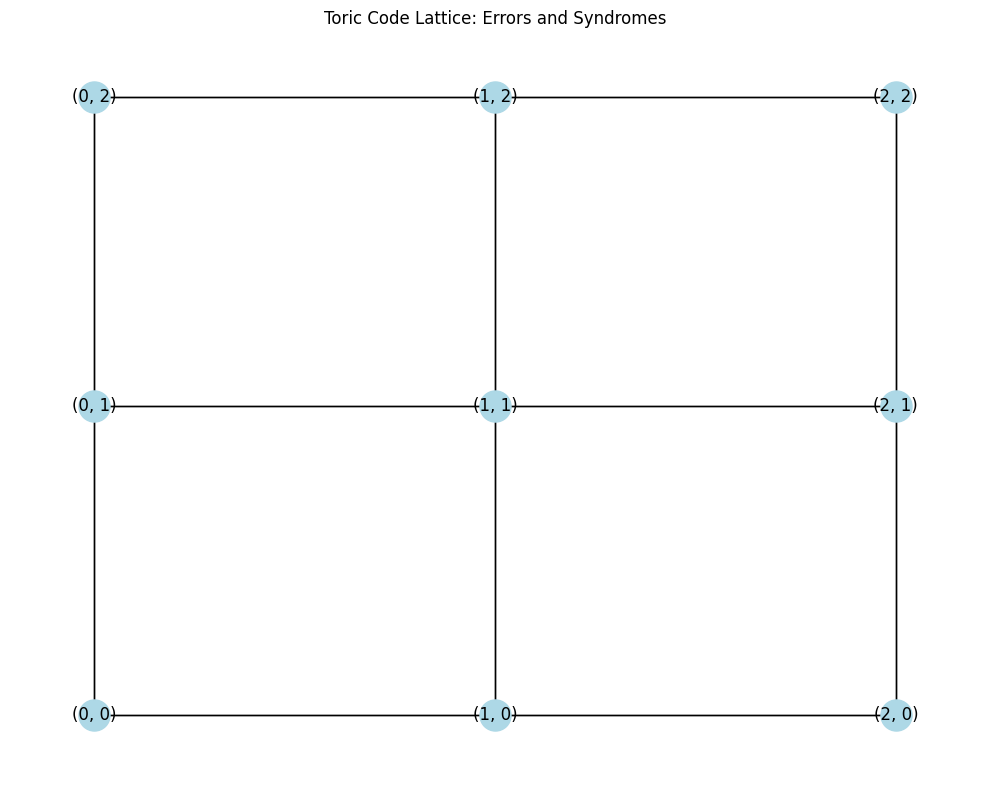


Error Correction Cycle 2
Errors detected: [(0, 0), (2, 1)]
Syndromes: [(0, 2), (1, 0), (1, 1), (2, 2)]


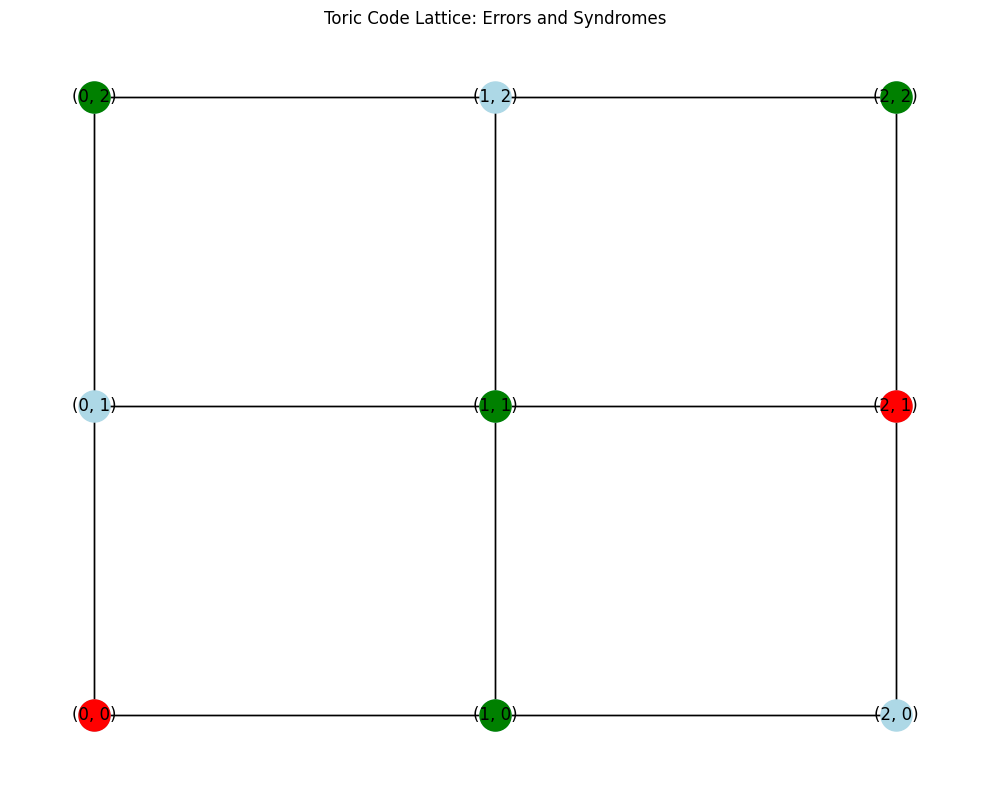


Error Correction Cycle 3
Errors detected: [(2, 1)]
Syndromes: [(0, 1), (1, 1), (2, 0), (2, 2)]


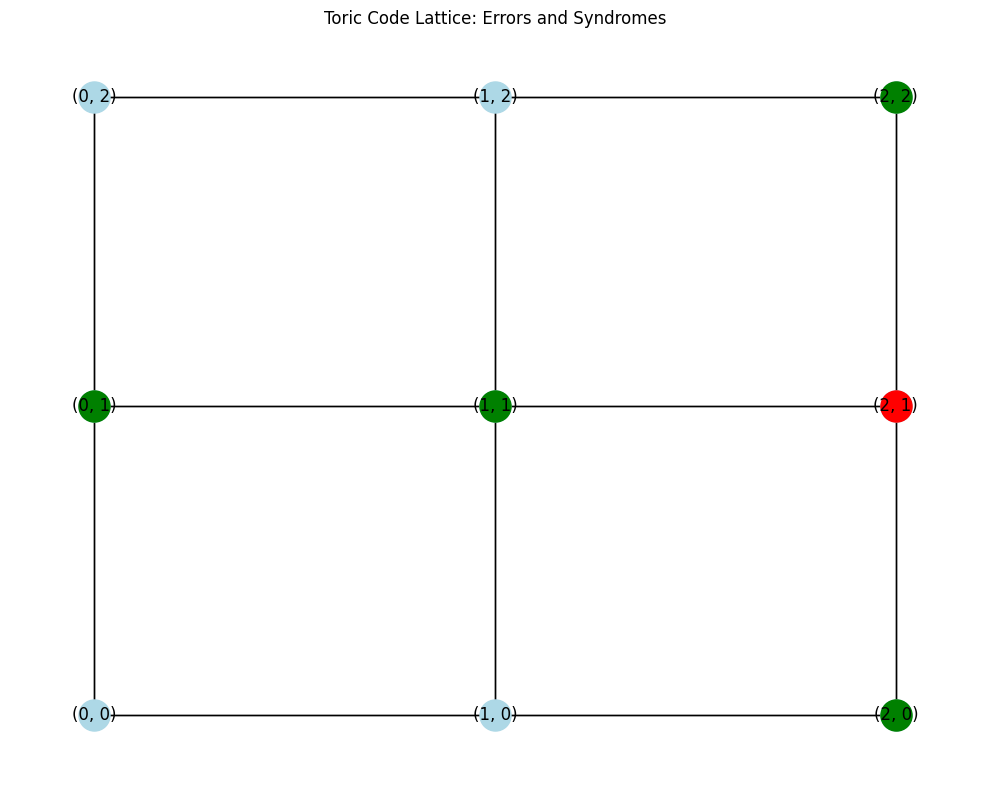

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class ToricCodeVisualizer:
    def __init__(self, rows=3, cols=3):
        """
        Initialize a toric code lattice visualization

        Args:
        rows (int): Number of rows in the toric lattice
        cols (int): Number of columns in the toric lattice
        """
        self.rows = rows
        self.cols = cols

        # Create a graph to represent the toric lattice
        self.graph = self.create_toric_lattice()

        # Error and syndrome tracking
        self.errors = []
        self.syndromes = []

    def create_toric_lattice(self):
        """
        Create a graph representation of the toric lattice

        Returns:
        networkx.Graph: Toric lattice graph
        """
        G = nx.grid_2d_graph(self.rows, self.cols)

        # Make the graph toroidal by connecting opposite edges
        for i in range(self.rows):
            G.add_edge((i, 0), (i, self.cols-1))

        for j in range(self.cols):
            G.add_edge((0, j), (self.rows-1, j))

        return G

    def simulate_errors(self, error_probability=0.1):
        """
        Simulate errors on the toric code lattice

        Args:
        error_probability (float): Probability of error on each qubit
        """
        self.errors = []
        for node in self.graph.nodes():
            if np.random.random() < error_probability:
                self.errors.append(node)

        return self.errors

    def calculate_syndromes(self):
        """
        Calculate syndromes based on errors

        Returns:
        list: Syndrome locations
        """
        self.syndromes = []
        for node in self.graph.nodes():
            # Count number of errors around each vertex
            neighbor_errors = sum(1 for neighbor in self.graph.neighbors(node)
                                  if neighbor in self.errors)

            # If odd number of neighboring errors, it's a syndrome
            if neighbor_errors % 2 == 1:
                self.syndromes.append(node)

        return self.syndromes

    def visualize(self):
        """
        Create a visualization of the toric code lattice
        showing errors and syndromes
        """
        plt.figure(figsize=(10, 8))
        plt.title("Toric Code Lattice: Errors and Syndromes")

        # Draw the graph
        pos = {node: node for node in self.graph.nodes()}
        nx.draw(self.graph, pos, node_color='lightblue',
                with_labels=True, node_size=500)

        # Highlight errors in red
        nx.draw_networkx_nodes(self.graph, pos,
                                nodelist=self.errors,
                                node_color='red',
                                node_size=500)

        # Highlight syndromes in green
        # the green nodes showing where the error correction algorithm
        # detected potential issues in the quantum state.
        nx.draw_networkx_nodes(self.graph, pos,
                                nodelist=self.syndromes,
                                node_color='green',
                                node_size=500)

        plt.tight_layout()
        plt.show()

def run_toric_code_simulation(num_cycles=3):
    """
    Run multiple error correction cycles

    Args:
    num_cycles (int): Number of error correction cycles to simulate
    """
    visualizer = ToricCodeVisualizer(rows=3, cols=3)

    for cycle in range(num_cycles):
        print(f"\nError Correction Cycle {cycle + 1}")

        # Simulate errors
        errors = visualizer.simulate_errors()
        print("Errors detected:", errors)

        # Calculate syndromes
        syndromes = visualizer.calculate_syndromes()
        print("Syndromes:", syndromes)

        # Visualize the current state
        visualizer.visualize()

# Run the simulation
run_toric_code_simulation()